In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0" #! specify gpu here

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from rich import print
import torch
import cv2
import matplotlib.pyplot as plt
from torch import optim, nn
import torchvision
from torchvision.datasets import MNIST
from torchvision import datasets, transforms
import pytorch_lightning as pl
from torchmetrics.classification import BinaryAccuracy
import clip
import exp_utils as exp_utils
import albumentations as A
from data_loader import DataLoader
from data_loader_even_pairwise import DataLoaderEvenPairwise
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
from IPython.display import display
# from main import _transform
from PIL import Image as PILImage
import imutils

from vision_pipeline.object_reid_superglue_ours import ObjectReIdSuperGlue

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:

#! WIP
# TODO: we want to predict the rotation only, GIVEN that we have the correct class


img1.shape
(600, 600, 3)

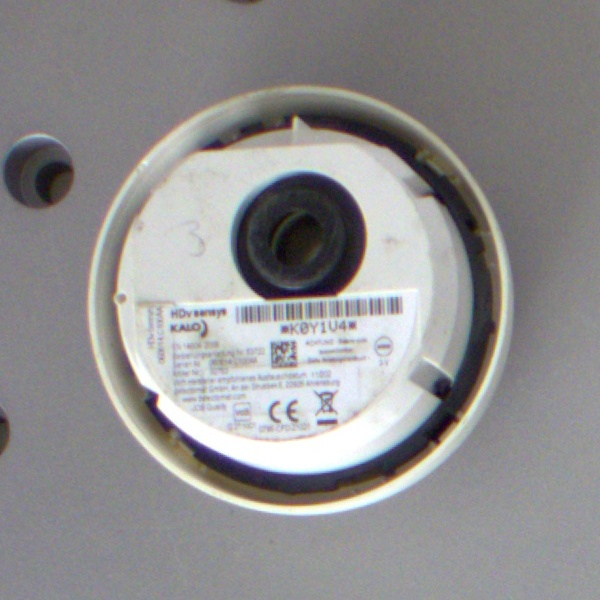

img2.shape
(600, 600, 3)

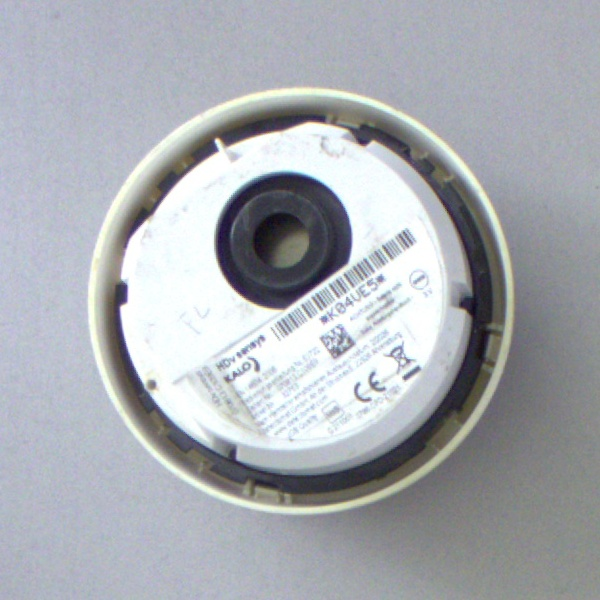

In [30]:
img_path1 = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped/firealarm_back_01/0028.jpg")
img1 = cv2.imread(img_path1)
print("img1.shape", img1.shape)

display(PILImage.fromarray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))) #! WIP

# img2 = imutils.rotate(img1, angle=30) # angle in degrees

img_path2 = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped/firealarm_back_01/0069.jpg")
img2 = cv2.imread(img_path2)

print("img2.shape", img2.shape)

display(PILImage.fromarray(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))) #! WIP

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device", device)


device cuda

In [32]:
#! WIP
model = os.path.expanduser("~/superglue_training/output/train/2023-11-18_superglue_model/weights/best.pt")
# model = "indoor"
object_reid_superglue = ObjectReIdSuperGlue(model)


curr_weights_path /root/superglue_training/output/train/2023-11-18_superglue_model/weights/best.pt

Loaded SuperPoint model
Loaded SuperGlue model ("/root/superglue_training/output/train/2023-11-18_superglue_model/weights/best.pt" weights)


starting compare...

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


angle_est using findHomography -0.5510808626311852 degrees: -31.57460759919559

confidence [0.5698589  0.641172   0.5829389  0.74751794 0.81214887 0.50005436
 0.71260357 0.8917941  0.5663859  0.61322653 0.77368546 0.84702575
 0.5819883  0.85498    0.7424246  0.91510147 0.5555102  0.94169945
 0.7267125  0.8180468  0.7831291  0.9443566  0.85759807 0.6723794
 0.7941662  0.93649656 0.77279615 0.93812525 0.86668414 0.9412393
 0.6012166  0.6483041  0.81740534 0.9453252  0.8285103  0.94673264
 0.94670916 0.6377037  0.9284398  0.8053523  0.9198749  0.9468726
 0.7210087  0.9286922  0.80240345 0.94114417 0.8953002  0.9468925
 0.7722903  0.93299675 0.9336746  0.9115299  0.9474453  0.94469976
 0.9463409  0.7208186  0.79000175 0.69678193 0.5421487  0.6629589
 0.646974   0.946053   0.7329869  0.7163816  0.9332415  0.93441343
 0.5681222  0.9100989  0.8417886  0.53516567 0.74152595 0.5753812
 0.66102993 0.9029682  0.60802776 0.56399816 0.7782507 ]

matches.shape 77
(77,)

mean_error 122.91799152312348

median_error 122.91799152312348

max_error 138.23068632943912

affine_loss (lower is better) 0.008069853196526325

score_ratio (higher is better) 0.2558139534883721

gt True

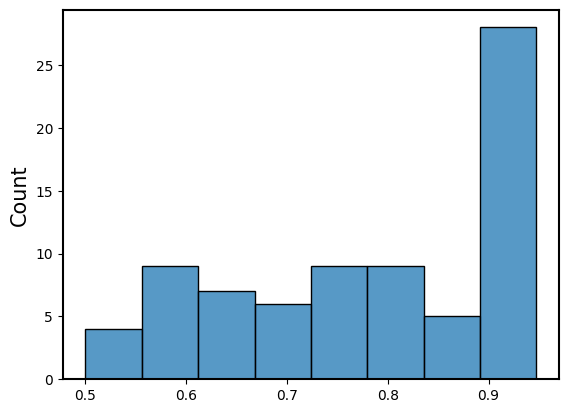

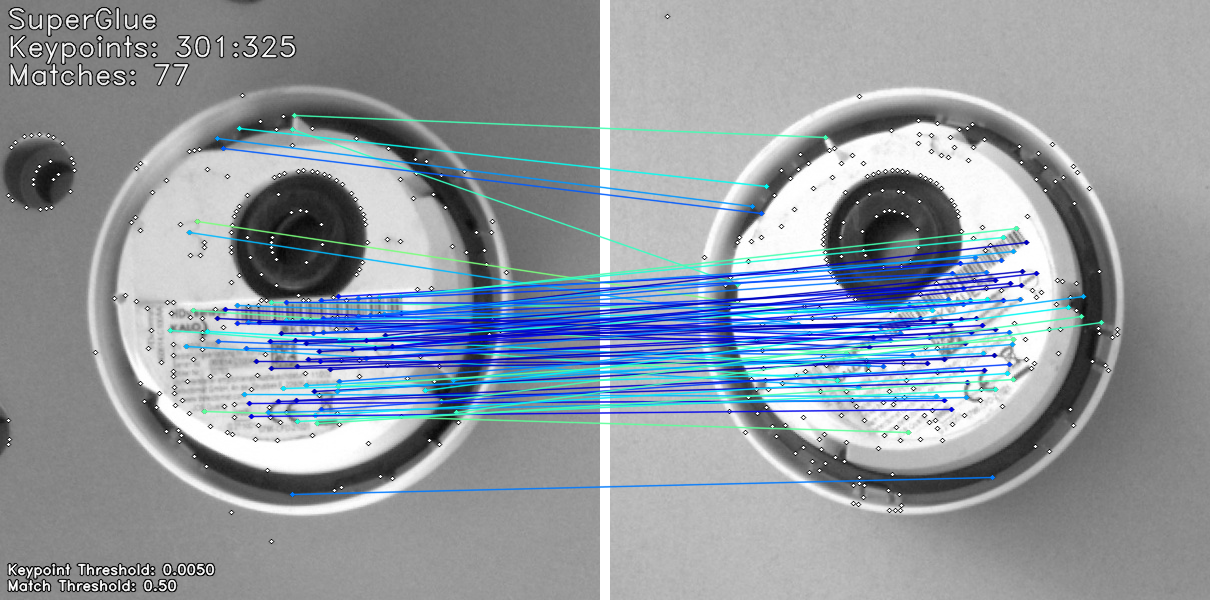

In [33]:
visualise = True
debug = True

min_matches = 10

# img1 = exp_utils.torch_to_grayscale_np_img(img1).astype(np.float32)
# img2 = exp_utils.torch_to_grayscale_np_img(img2).astype(np.float32)
img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY).astype(np.float32)
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY).astype(np.float32)

affine_score, score_ratio, mconf, median_affine_error, len_matches, vis_out, angle = object_reid_superglue.compare(img1_grey, img2_grey, gt=True, visualise=visualise, debug=debug)

if visualise:
    sns.histplot(mconf)
    plt.show()

if visualise and vis_out is not None:            
    display(Image.fromarray(vis_out))
 

In [34]:
print("angle", angle, "degrees", np.rad2deg(angle))

angle -0.5510808626311852 degrees -31.57460759919559